In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Data Source:
#For Gold : https://www.nasdaq.com/market-activity/commodities/gc:cmx/historical
#For Oil : https://www.nasdaq.com/market-activity/commodities/cl:nmx

oil_data = "Resources/Historical_Oil_Data.csv"
gold_data = "Resources/Historical_Gold_Data.csv"

In [3]:
#Converting the csv file to DataFrame
oil_data = pd.read_csv(oil_data, parse_dates= ["Date"])
gold_data = pd.read_csv(gold_data, parse_dates = ["Date"])

In [4]:
# Merging tow DataFrame
oil_gold_df = pd.merge(oil_data, gold_data, how="left", on="Date")

In [5]:
type(oil_gold_df["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
# Rename the columns
oil_gold_df = oil_gold_df.rename(columns={"Close/Last_x" : "oil_price",
                                "Volume_x" : "oil_volume",
                                "Close/Last_y" : "gold_price",
                                "Volume_y" : "gold_volume"})
oil_gold_df

,Date,oil_price,oil_volume,Open_x,High_x,Low_x,gold_price,gold_volume,Open_y,High_y,Low_y
0,2023-02-03,73.39,394327,75.92,78.00,73.10,1876.6,296669.0,1926.3,1932.4,1874.5
1,2023-02-02,75.88,318489,76.79,77.24,74.97,1930.8,242931.0,1967.1,1975.2,1925.6
2,2023-02-01,76.41,335699,79.06,79.73,76.05,1942.8,205037.0,1944.0,1970.8,1936.1
3,2023-01-31,78.87,292507,77.91,79.25,76.55,1945.3,189046.0,1938.6,1946.9,1915.5
4,2023-01-30,77.90,308615,80.04,80.49,77.66,1939.2,134362.0,1944.0,1950.1,1936.2
...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-12,59.29,699404,59.12,60.83,59.10,1326.4,203283.0,1317.1,1330.0,1316.3
1255,2018-02-09,59.20,878528,60.43,60.77,58.07,1315.7,306980.0,1321.0,1325.0,1313.2
1256,2018-02-08,61.15,882388,61.70,62.09,60.27,1319.0,349123.0,1320.7,1324.5,1309.0
1257,2018-02-07,61.79,975908,63.92,64.18,61.25,1314.6,335680.0,1326.6,1334.8,1313.5


In [7]:
oil_gold_df.columns

Index(['Date', 'oil_price', 'oil_volume', 'Open_x', 'High_x', 'Low_x',
       'gold_price', 'gold_volume', 'Open_y', 'High_y', 'Low_y'],
      dtype='object')

In [8]:
# Reducing the columns and making new DataFrame
clean_oil_gold_df = oil_gold_df[['Date', 'oil_price', 'oil_volume','gold_price', 'gold_volume']]
clean_oil_gold_df

,Date,oil_price,oil_volume,gold_price,gold_volume
0,2023-02-03,73.39,394327,1876.6,296669.0
1,2023-02-02,75.88,318489,1930.8,242931.0
2,2023-02-01,76.41,335699,1942.8,205037.0
3,2023-01-31,78.87,292507,1945.3,189046.0
4,2023-01-30,77.90,308615,1939.2,134362.0
...,...,...,...,...,...
1254,2018-02-12,59.29,699404,1326.4,203283.0
1255,2018-02-09,59.20,878528,1315.7,306980.0
1256,2018-02-08,61.15,882388,1319.0,349123.0
1257,2018-02-07,61.79,975908,1314.6,335680.0


In [9]:
# Setting Date as Index to perform Monthly, Quartrly and Yearly oparetions
date_index_df = clean_oil_gold_df.set_index(["Date"]).sort_values(["Date"])
date_index_df.head()

,oil_price,oil_volume,gold_price,gold_volume
Date,,,,
2018-02-06,63.39,773274,1329.5,457363.0
2018-02-07,61.79,975908,1314.6,335680.0
2018-02-08,61.15,882388,1319.0,349123.0
2018-02-09,59.20,878528,1315.7,306980.0
2018-02-12,59.29,699404,1326.4,203283.0


In [10]:
date_index_df.index

DatetimeIndex(['2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
               '2018-02-12', '2018-02-13', '2018-02-14', '2018-02-15',
               '2018-02-16', '2018-02-20',
               ...
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

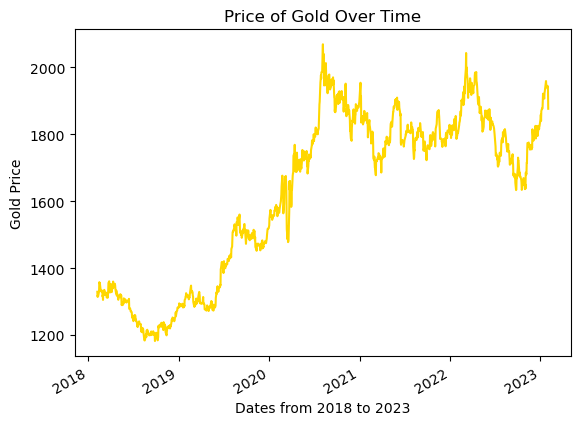

In [11]:
# Daily gold prices
date_index_df.gold_price.plot(color = "gold") 
plt.xlabel("Dates from 2018 to 2023")
plt.ylabel("Gold Price")
plt.title("Price of Gold Over Time")
plt.savefig("Output/Daily_Gold_Prices.png")

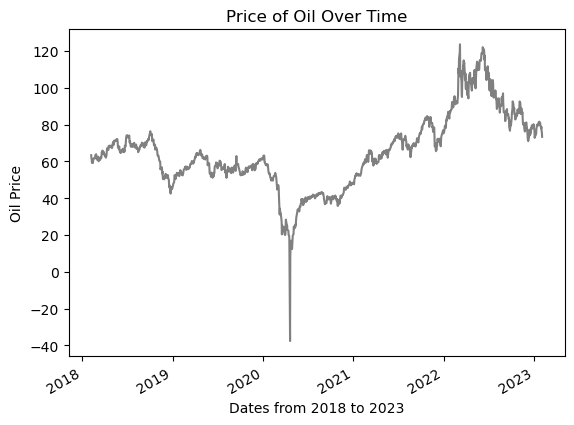

In [12]:
 # Daily oil prices from 2018 to 2023
date_index_df.oil_price.plot(color = "grey")
plt.xlabel("Dates from 2018 to 2023")
plt.ylabel("Oil Price")
plt.title("Price of Oil Over Time")
plt.savefig("Output/Daily_Oil_Prices.png")

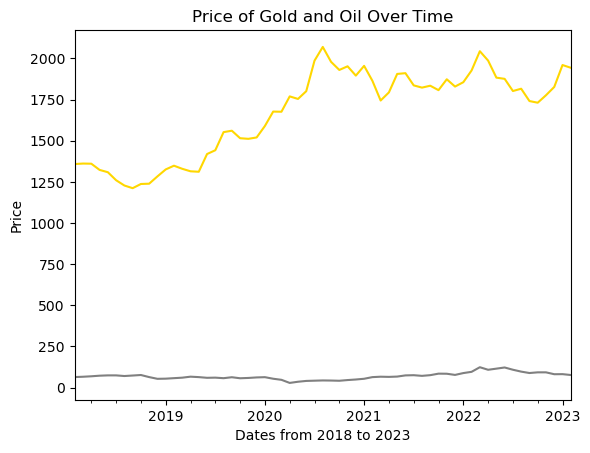

In [13]:
# Daily Gold Price vs Daily Oil Price from 2018 to 2023
date_index_df.gold_price.resample("M").max().plot(color = "gold")
date_index_df.oil_price.resample("M").max().plot(color = "grey")
plt.xlabel("Dates from 2018 to 2023")
plt.ylabel("Price")
plt.title("Price of Gold and Oil Over Time")
plt.savefig("Output/Change_in_Prices.png")

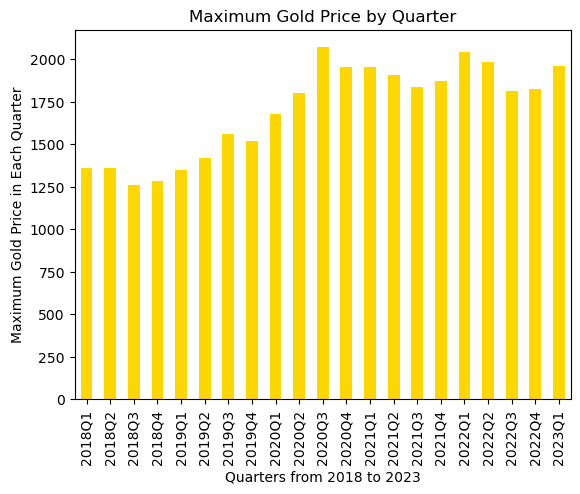

In [15]:
# Max Price of Gold in each quarter from 2018 to 2023
clean_oil_gold_df.groupby(clean_oil_gold_df["Date"].dt.to_period('Q'))['gold_price'].max().plot(kind="bar", color = "gold")
plt.xlabel("Quarters from 2018 to 2023")
plt.ylabel("Maximum Gold Price in Each Quarter")
plt.title("Maximum Gold Price by Quarter")
plt.savefig("Output/Max_Gold_Prices_Quarterly.png")

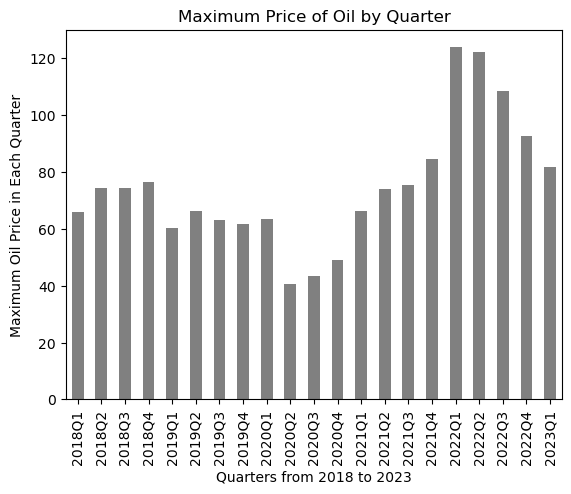

In [16]:
# # Max Price of Oil in each quarter from 2018 to 2023
clean_oil_gold_df.groupby(clean_oil_gold_df["Date"].dt.to_period('Q'))['oil_price'].max().plot(kind="bar", color = "grey")
plt.xlabel("Quarters from 2018 to 2023")
plt.ylabel("Maximum Oil Price in Each Quarter")
plt.title("Maximum Price of Oil by Quarter")
plt.savefig("Output/Max_Oil_Prices_Quarterly.png")

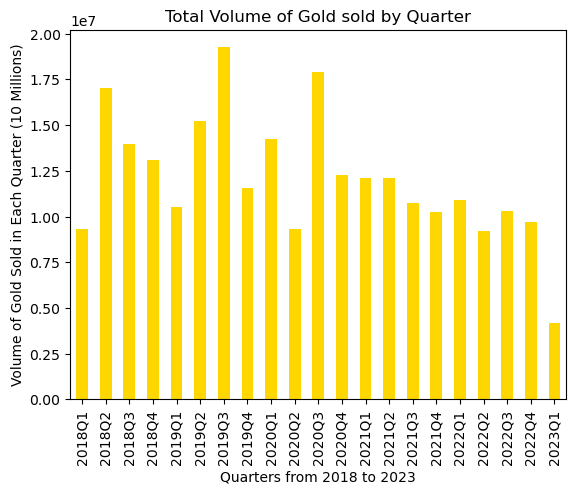

In [17]:
# Total Volume of Gold in each quarter from 2018 to 2023
clean_oil_gold_df.groupby(clean_oil_gold_df["Date"].dt.to_period('Q'))['gold_volume'].sum().plot(kind="bar", color = "gold") # Quarterly gold volume
plt.xlabel("Quarters from 2018 to 2023")
plt.ylabel("Volume of Gold Sold in Each Quarter (10 Millions)")
plt.title("Total Volume of Gold sold by Quarter")
plt.savefig("Output/Max_Gold_Volume_Quarterly.png")

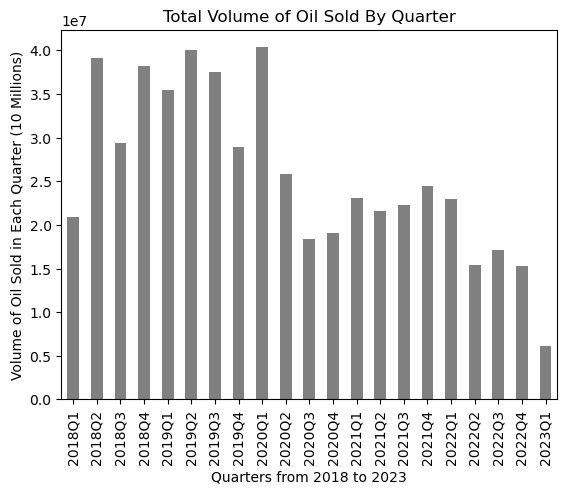

In [20]:
# Total Volume of Oil in each quarter from 2018 to 2023
clean_oil_gold_df.groupby(clean_oil_gold_df["Date"].dt.to_period('Q'))['oil_volume'].sum().plot(kind="bar", color = "grey") # Quarterly gold volume
plt.xlabel("Quarters from 2018 to 2023")
plt.ylabel("Volume of Oil Sold in Each Quarter (10 Millions)")
plt.title("Total Volume of Oil Sold By Quarter")
plt.savefig("Output/Max_Oil_Volume_Quarterly.png")

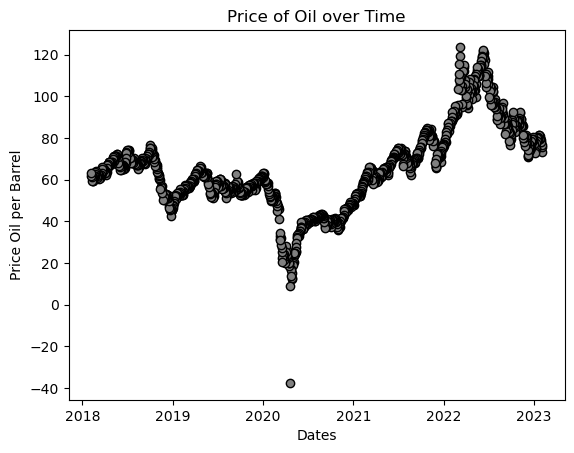

In [21]:

# Scatter Plot for Oil Price
x_values = clean_oil_gold_df["Date"]
y_values = clean_oil_gold_df["oil_price"]

plt.scatter(x_values,y_values,edgecolors="black", c="grey")
plt.xlabel("Dates")
plt.ylabel("Price Oil per Barrel")
plt.title("Price of Oil over Time")
plt.savefig("Output/Oil_Price_Scatter.png")


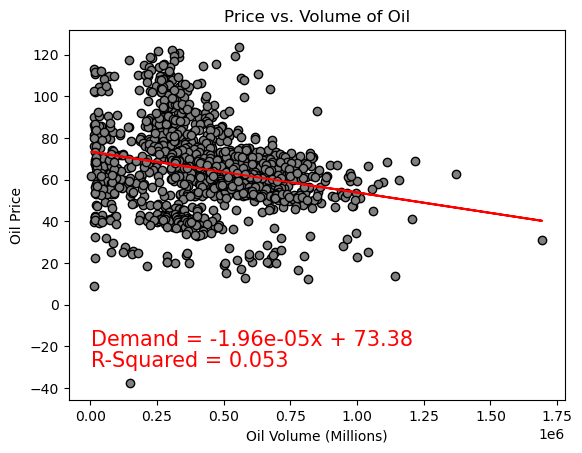

In [22]:
# Scatter Plot for Oil Price vs. Oil Volume, Regression Line
x_values = clean_oil_gold_df["oil_volume"]
y_values = clean_oil_gold_df["oil_price"]
correlation = round(st.pearsonr(x_values,y_values)[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regression_values = x_values*slope +intercept
Regression_Line = "Demand = " + str(round(slope,7)) + "x + " + str(round(intercept,2))
R_Squared = "R-Squared = " + str(round(rvalue**2,3))
plt.scatter(x_values,y_values,edgecolors="black", c="grey")
plt.plot(x_values,regression_values,color = "red",alpha=1)
plt.annotate(Regression_Line,(1200,-20),fontsize=15,color="red")
plt.annotate(R_Squared,(1200,-30),fontsize=15,color="red")
plt.xlabel("Oil Volume (Millions)")
plt.ylabel("Oil Price")
plt.title("Price vs. Volume of Oil")
plt.savefig("Output/Price_vs._Volume_Oil.png")

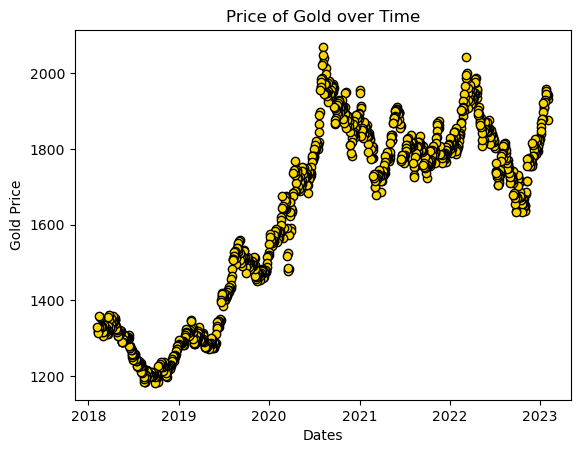

In [23]:
# Scatter Plot for Gold Price
x_values = clean_oil_gold_df["Date"]
y_values = clean_oil_gold_df["gold_price"]

plt.scatter(x_values,y_values,edgecolors="black", c="gold")
plt.xlabel("Dates")
plt.ylabel("Gold Price")
plt.title("Price of Gold over Time")
plt.savefig("Output/Gold_Price_Scatter.png")

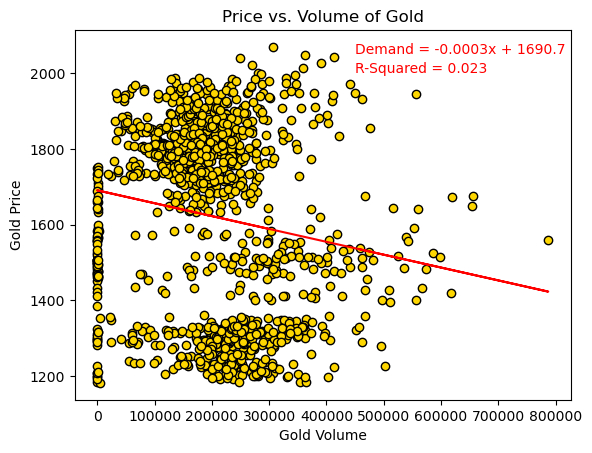

In [24]:
# Scatter Plot for Gold Price vs. Gold Volume, Regression Line
clean_oil_gold_df = clean_oil_gold_df.dropna(how='any')
clean_oil_gold_df.count()
x_values = clean_oil_gold_df["gold_volume"]
y_values = clean_oil_gold_df["gold_price"]
correlation = round(st.pearsonr(x_values,y_values)[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regression_values = x_values*slope +intercept
Regression_Line = "Demand = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
R_Squared = "R-Squared = " + str(round(rvalue**2,3))
plt.scatter(x_values,y_values,edgecolors="black", c="gold")
plt.plot(x_values,regression_values,color = "red",alpha=1)
plt.annotate(Regression_Line,(450000,2050),fontsize=10,color="red")
plt.annotate(R_Squared,(450000,2000),fontsize=10,color="red")
plt.xlabel("Gold Volume")
plt.ylabel("Gold Price")
plt.title("Price vs. Volume of Gold")
plt.savefig("Output/Price_vs._Volume_Gold.png")

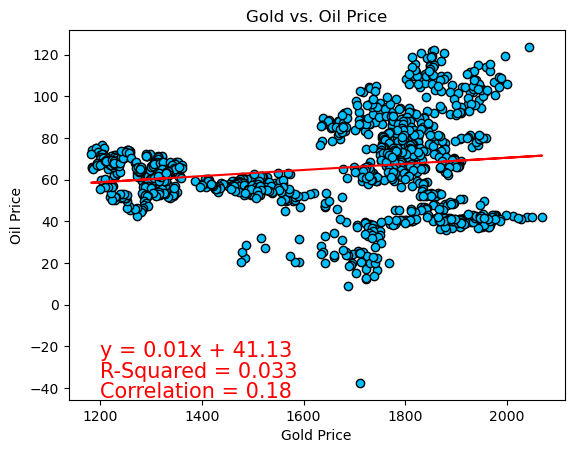

In [25]:
# Scatter Plot for Gold Price vs. Oil Price, Regression Line
x_values = clean_oil_gold_df["gold_price"]
y_values = clean_oil_gold_df["oil_price"]
correlation = "Correlation = " + str(round(st.pearsonr(x_values,y_values)[0],2))
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regression_values = x_values*slope +intercept
Regression_Line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
R_Squared = "R-Squared = " + str(round(rvalue**2,3))
plt.scatter(x_values,y_values,edgecolors="black", c="deepskyblue")
plt.plot(x_values,regression_values,color = "red",alpha=1)
plt.annotate(Regression_Line,(1200,-25),fontsize=15,color="red")
plt.annotate(R_Squared,(1200,-35),fontsize=15,color="red")
plt.annotate(correlation,(1200,-45),fontsize=15,color="red")
plt.xlabel("Gold Price")
plt.ylabel("Oil Price")
plt.title("Gold vs. Oil Price")
plt.savefig("Output/Gold_vs._Oil_Prices.png")

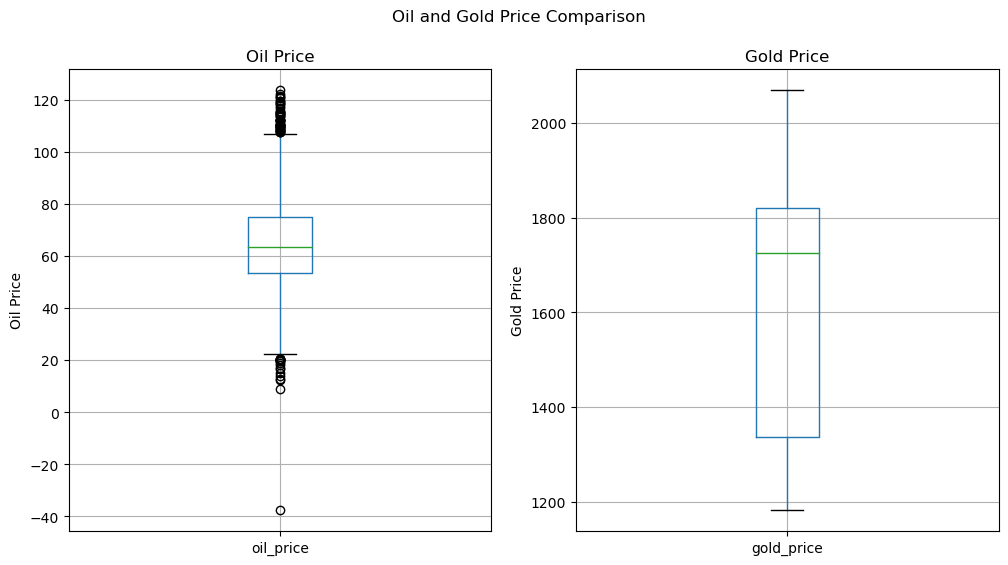

In [26]:
#Creation of the Boxplots
#Create a figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the box plot for oil prices
clean_oil_gold_df.boxplot(column='oil_price' ,ax=ax1)
ax1.set_ylabel('Oil Price')
ax1.set_title("Oil Price")

# Plot the box plot for gold prices
clean_oil_gold_df.boxplot(column='gold_price', ax=ax2)
ax2.set_ylabel('Gold Price')
ax2.set_title("Gold Price")

# Add a title to the figure
fig.suptitle("Oil and Gold Price Comparison")

# Show the figure
plt.savefig("Output/Gold_Oil_Boxplots.png")

In [27]:
# Calculating the Outliers of Oil price
oil_price = clean_oil_gold_df['oil_price']
quartiles = oil_price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

nooutlier_oil = clean_oil_gold_df[(clean_oil_gold_df['oil_price']>lower_bound) & (clean_oil_gold_df['oil_price']<upper_bound)]

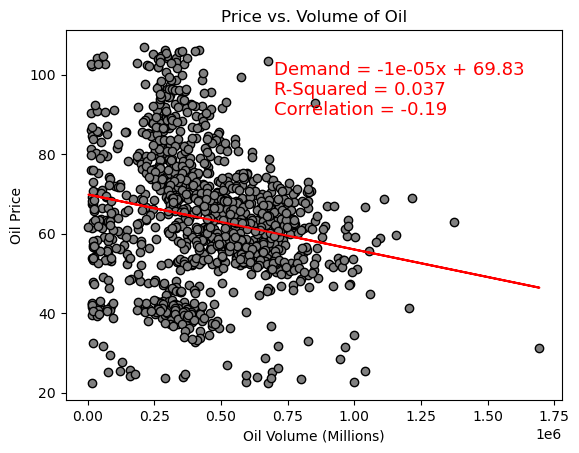

In [28]:
# Scatter plot without the outliers of Oil Price
x_values = nooutlier_oil["oil_volume"]
y_values = nooutlier_oil["oil_price"]
correlation = "Correlation = " + str(round(st.pearsonr(x_values,y_values)[0],2))
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regression_values = x_values*slope +intercept
Regression_Line = "Demand = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
R_Squared = "R-Squared = " + str(round(rvalue**2,3))
plt.scatter(x_values,y_values,edgecolors="black", c="grey")
plt.plot(x_values,regression_values,color = "red",alpha=1)
plt.annotate(Regression_Line,(700000,100),fontsize=13,color="red")
plt.annotate(R_Squared,(700000,95),fontsize=13,color="red")

plt.annotate(correlation,(700000,90),fontsize=13,color="red")
plt.xlabel("Oil Volume (Millions)")
plt.ylabel("Oil Price")
plt.title("Price vs. Volume of Oil")
plt.savefig("Output/Price_vs._Volume_Oil_Clean.png")

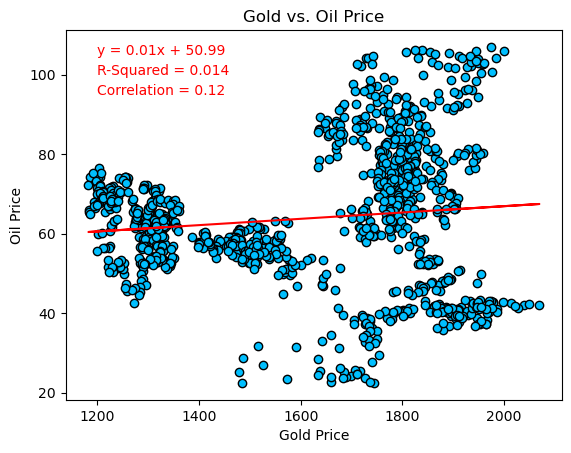

In [29]:
# Scatter plot without the outliers of Oil Price
x_values = nooutlier_oil["gold_price"]
y_values = nooutlier_oil["oil_price"]
correlation = "Correlation = " + str(round(st.pearsonr(x_values,y_values)[0],2))
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regression_values = x_values*slope +intercept
Regression_Line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
R_Squared = "R-Squared = " + str(round(rvalue**2,3))
plt.scatter(x_values,y_values,edgecolors="black", c="deepskyblue")
plt.plot(x_values,regression_values,color = "red",alpha=1)
plt.annotate(Regression_Line,(1200,105),fontsize=10,color="red")
plt.annotate(R_Squared,(1200,100),fontsize=10,color="red")
plt.annotate(correlation,(1200,95),fontsize=10,color="red")
plt.xlabel("Gold Price")
plt.ylabel("Oil Price")
plt.title("Gold vs. Oil Price")
plt.savefig("Output/Gold_vs._Oil_Prices_Clean.png")

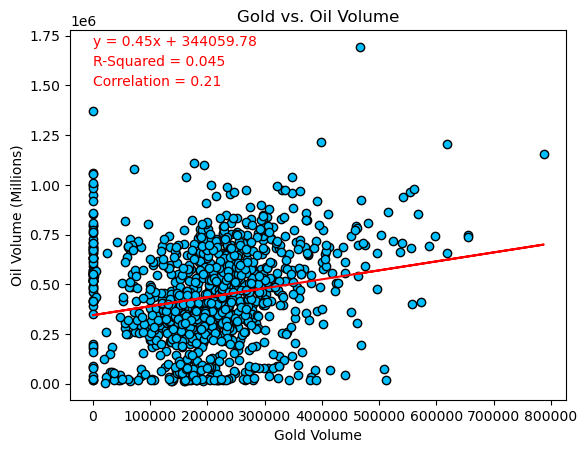

In [30]:
# Scatter plot without the outliers of Oil Price
x_values = nooutlier_oil["gold_volume"]
y_values = nooutlier_oil["oil_volume"]
correlation = "Correlation = " + str(round(st.pearsonr(x_values,y_values)[0],2))
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regression_values = x_values*slope +intercept
Regression_Line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
R_Squared = "R-Squared = " + str(round(rvalue**2,3))
plt.scatter(x_values,y_values,edgecolors="black", c="deepskyblue")
plt.plot(x_values,regression_values,color = "red",alpha=1)
plt.annotate(Regression_Line,(1000,1700000),fontsize=10,color="red")
plt.annotate(R_Squared,(1000,1600000),fontsize=10,color="red")
plt.annotate(correlation,(1000,1500000),fontsize=10,color="red")
plt.xlabel("Gold Volume")
plt.ylabel("Oil Volume (Millions)")
plt.title("Gold vs. Oil Volume")
plt.savefig("Output/Gold_vs._Oil_Volumes_Clean.png")